### Install package from console or within script

In [1]:
# install package into your environment through your console via
# pip install ABRSQOL
# or install it from this script:
import subprocess, sys
subprocess.check_call([sys.executable, "-m", "pip", "install", 'aabpl', "--upgrade"])

0

### set up working directory and folders

In [2]:
import os
# Create output folders if they don't exist
working_directory = "./" # specify your folder path here C:/User/YourName/YourFolder
output_data_folder = os.path.join(working_directory, "output_data/")
output_gis_folder = os.path.join(working_directory, "output_gis/")
output_maps_folder = os.path.join(working_directory, "output_maps/")
temp_folder = os.path.join(working_directory, "temp")
os.makedirs(output_data_folder, exist_ok=True)
os.makedirs(output_gis_folder, exist_ok=True)
os.makedirs(output_maps_folder, exist_ok=True)
os.makedirs(temp_folder, exist_ok=True)

### Import packages

In [3]:
from pandas import read_csv
from aabpl.main import radius_search, detect_cluster_pts, detect_cluster_cells
from aabpl.testing.test_performance import analyze_func_perf, func_timer_dict

In [4]:
import numpy as np
type(np.linspace(0,1,3))

numpy.ndarray

In [5]:
path_to_your_csv = '../../cbsa_sample_data/plants_10180.txt'
# path_to_your_csv = '../DebuggingArena/GA/plants/prime_points_weighted_1.txt'
crs_of_your_csv =  "EPSG:4326"
pts = read_csv(path_to_your_csv, sep=",", header=None)
pts.columns = ["eid", "employment", "industry", "lat","lon","moved"]

In [6]:
grid = detect_cluster_cells(
    pts=pts,
    crs="EPSG:4326",
    r=750,
    columns=['employment'],
    exclude_pt_itself=True,
    distance_thresholds=2500,
    k_th_percentiles=99.97,
    n_random_points=int(1e5),
    make_convex=True,
    random_seed=0,
    silent = True,
)

## Save DataFrames with radius sums and clusters
Using all the save options below is most likely excessive. saving the shapefile for save_grid_clusters and save_sparse_grid is most likely sufficient

In [7]:
# save files as needed
# save only only clusters including their geometry, aggregate values, area and id
grid.save_cell_clusters(filename=output_gis_folder+'grid_clusters', file_format='shp')
grid.save_cell_clusters(filename=output_data_folder+'grid_clusters', file_format='csv')
# save sparse grid including cells only those cells that at least contain one point
grid.save_sparse_grid(filename=output_gis_folder+'grid_clusters', file_format='shp')
grid.save_sparse_grid(filename=output_data_folder+'grid_clusters', file_format='csv')
# save full grid including cells that have no points in them (through many empty cells this will occuppy unecessary disk space)
grid.save_full_grid(filename=output_gis_folder+'grid_clusters', file_format='shp')
grid.save_full_grid(filename=output_data_folder+'grid_clusters', file_format='csv')

pts.to_csv(output_data_folder+'pts_w_clusters.csv')

IndexError: index 78400 is out of bounds for axis 0 with size 78400

## Create Plots

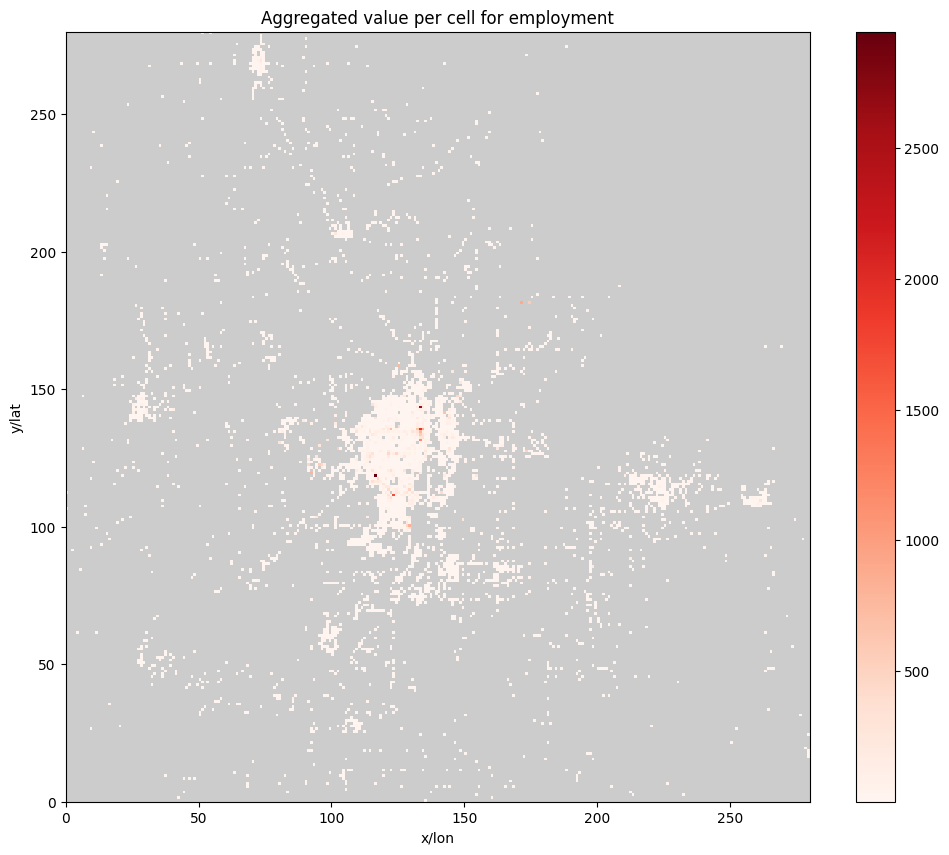

In [7]:
grid.plot.cell_aggregates()

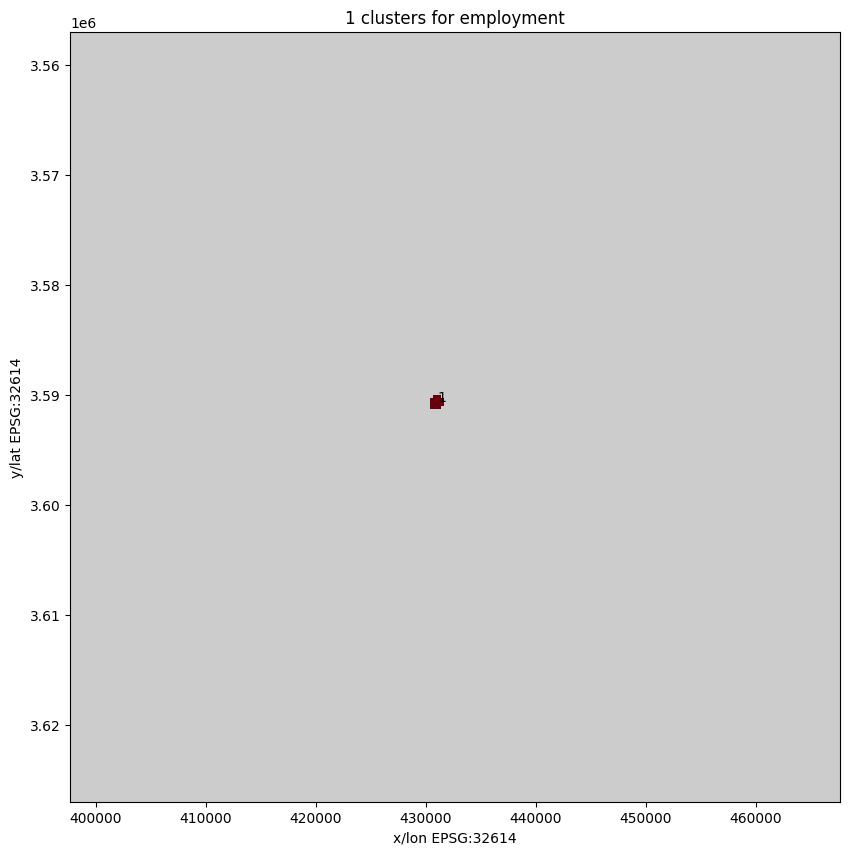

In [8]:
grid.plot.clusters(output_maps_folder+'clusters_employment_750m_9975th')

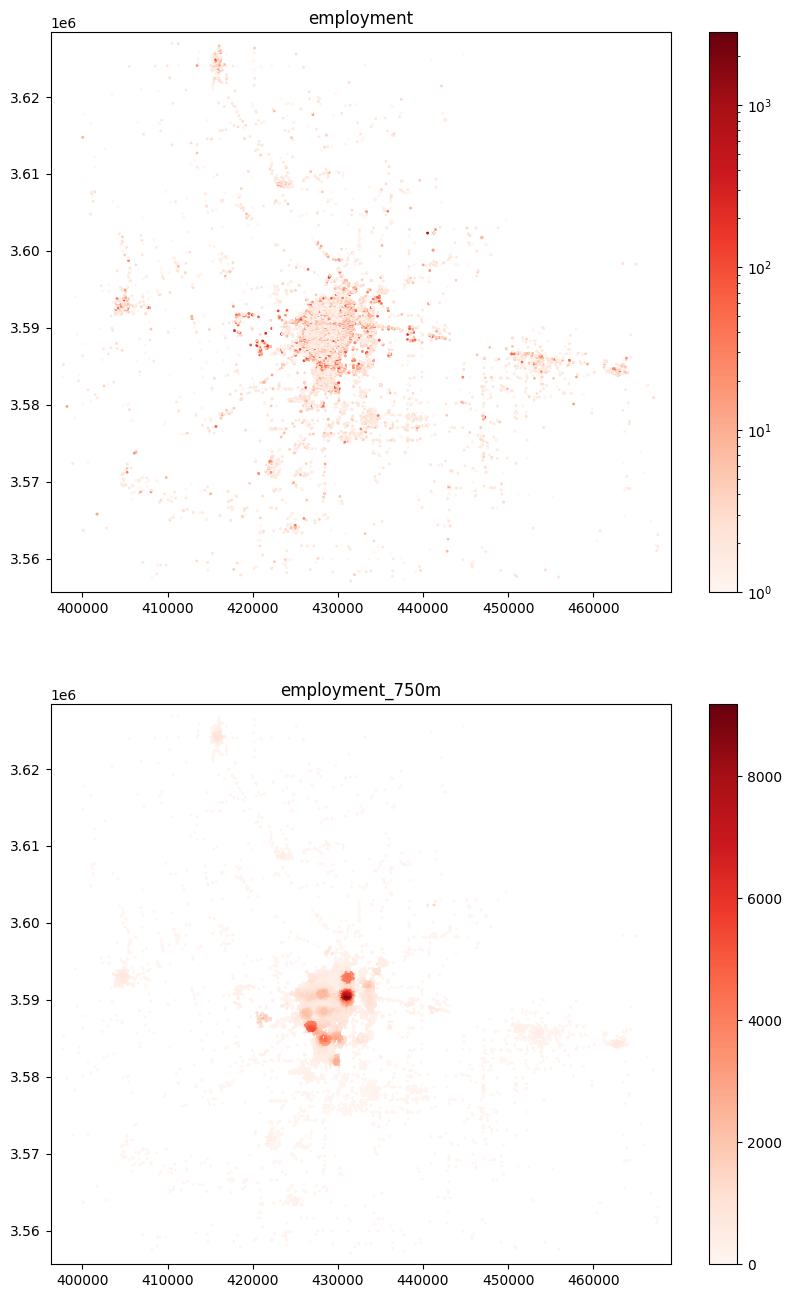

In [9]:
grid.plot.cluster_vars()

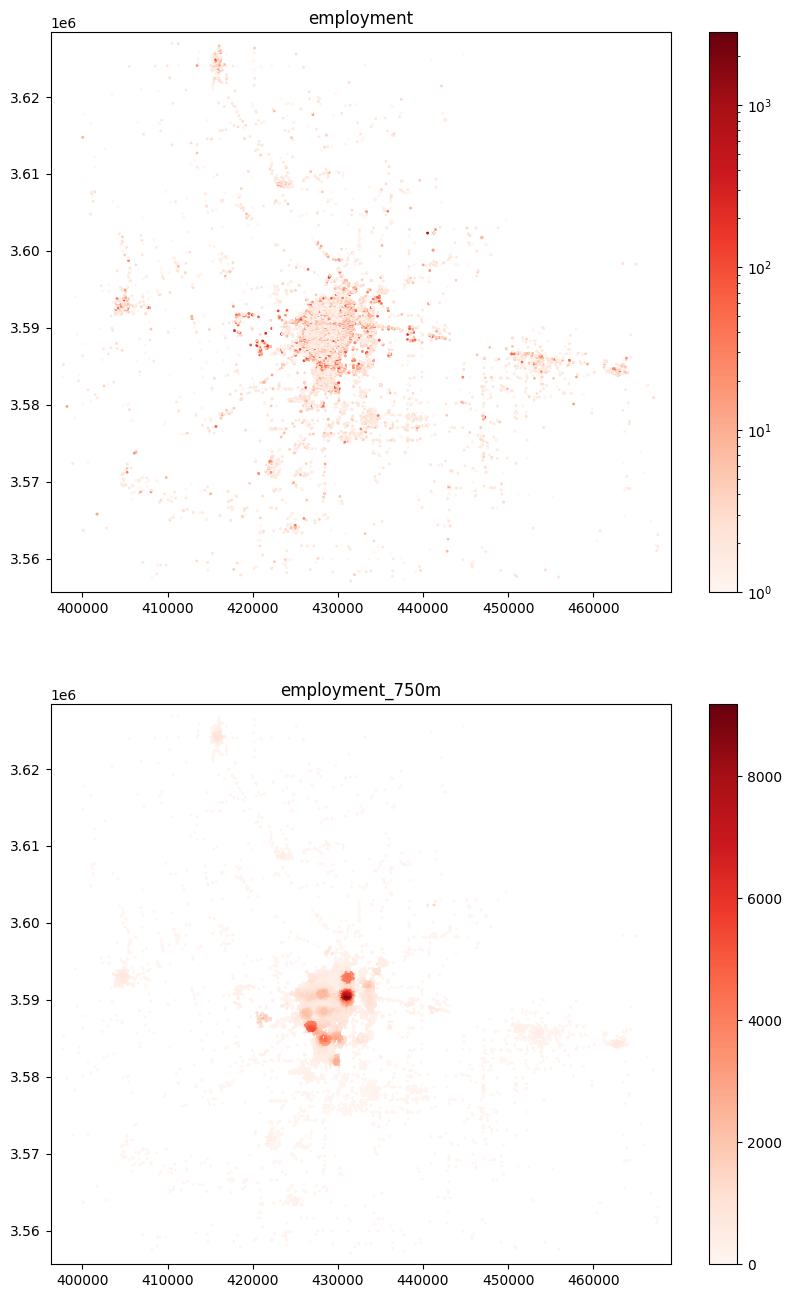

In [10]:
grid.plot.vars(filename=output_maps_folder+'employment_vars')

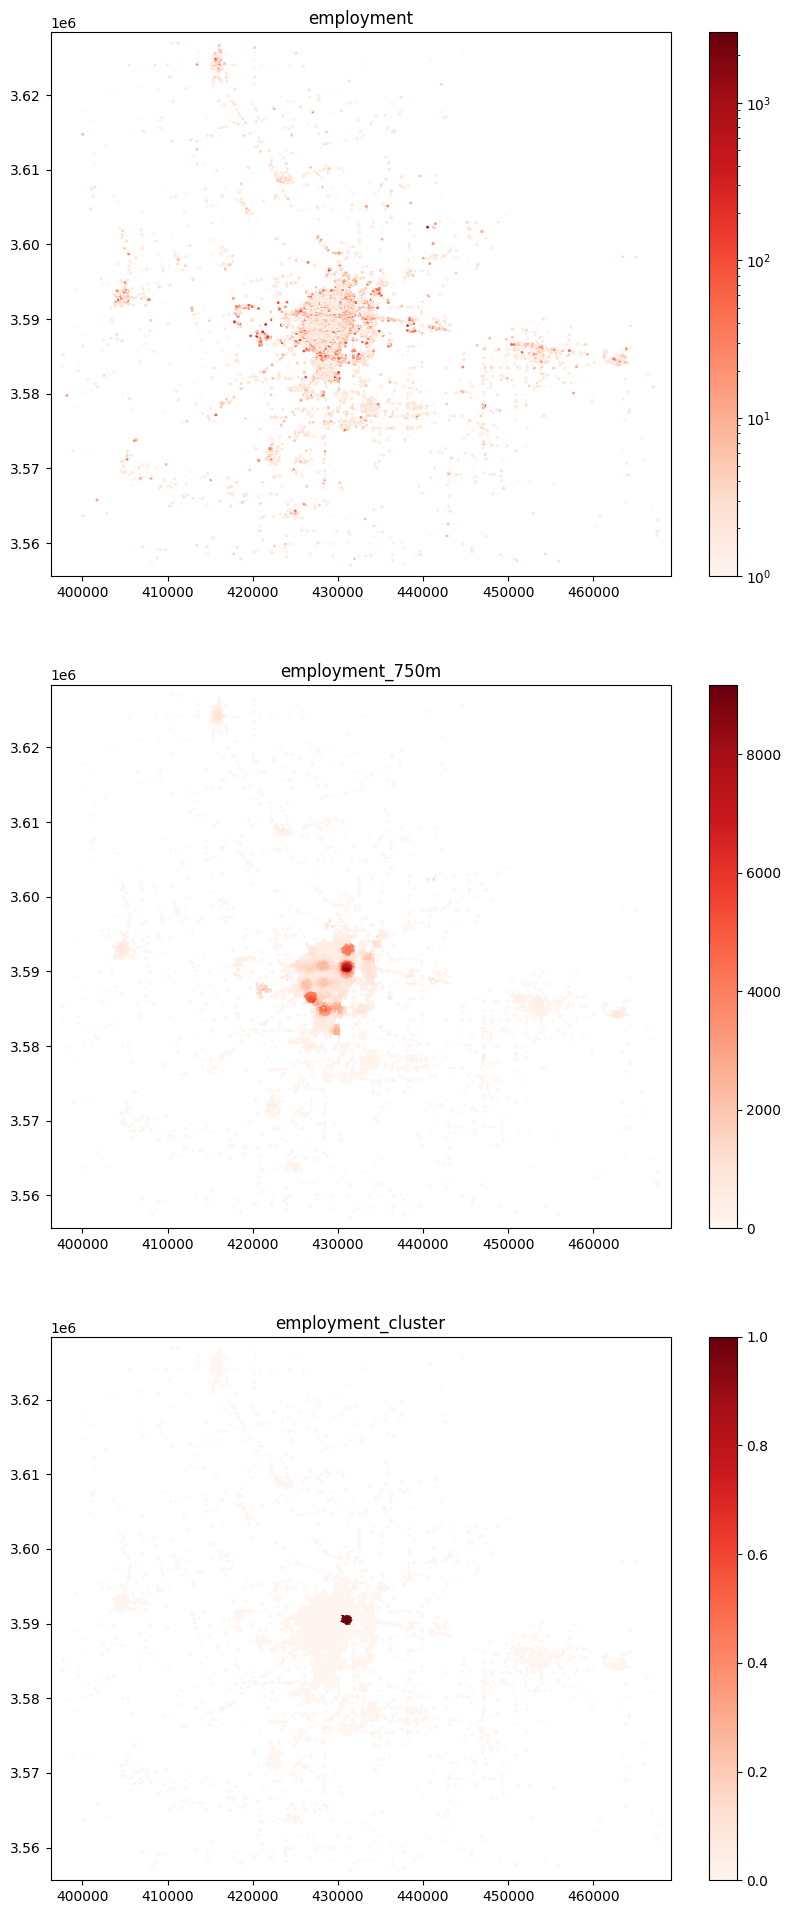

In [11]:
grid.plot.cluster_pts(filename=output_maps_folder+'employment_cluster_pts')

['employment_750m'] [np.float64(6269.005399999995)] [99.97]


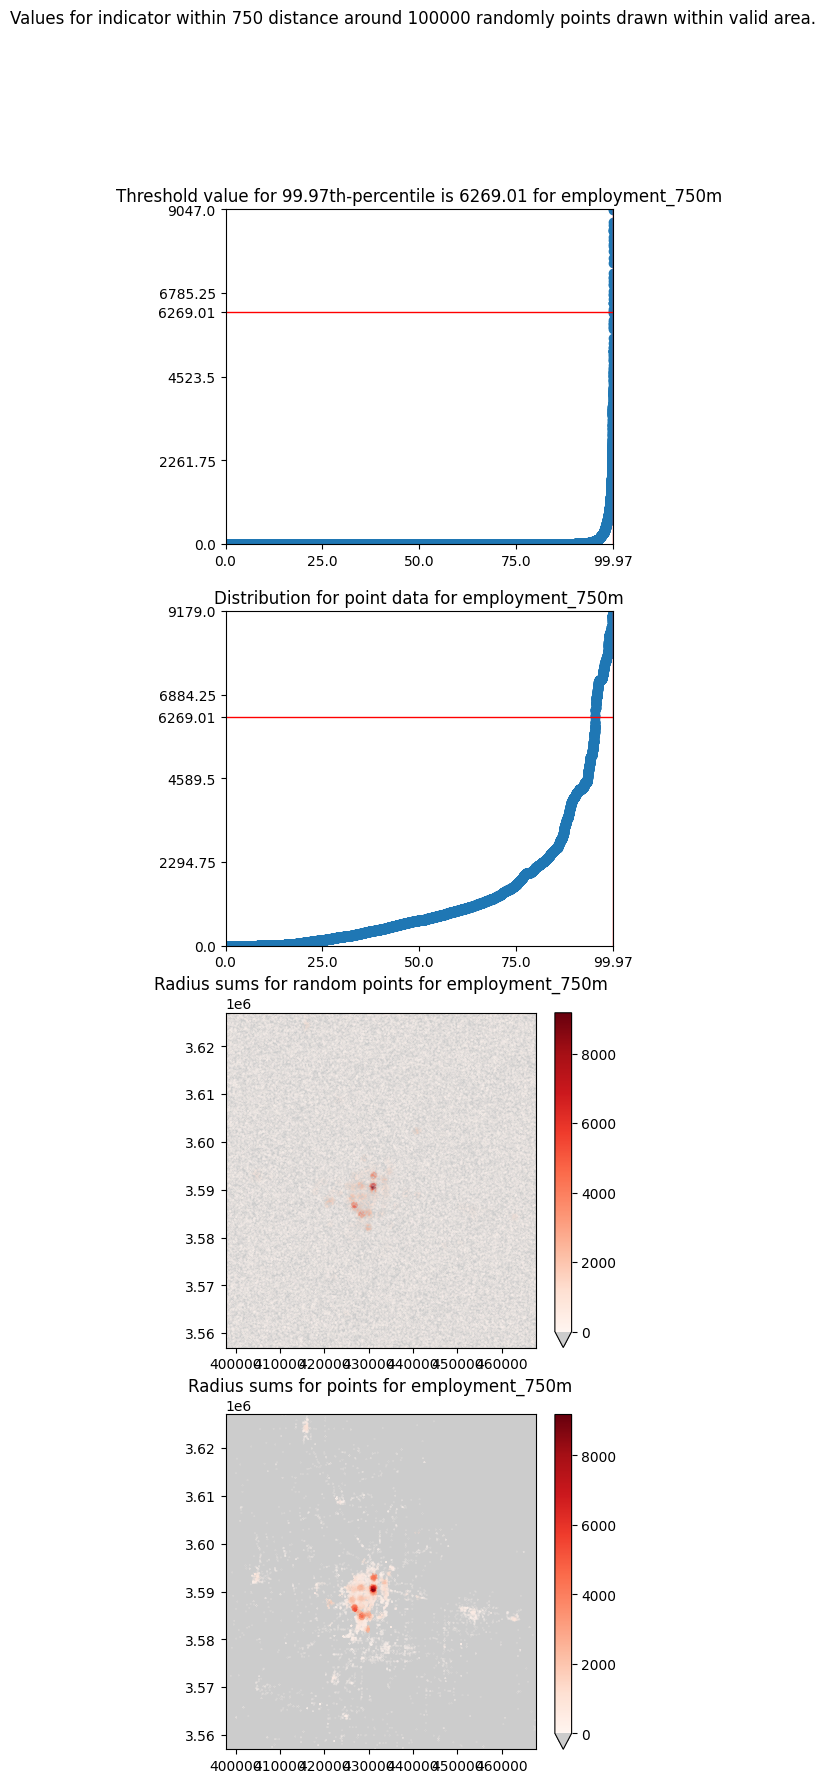

In [12]:
grid.plot.rand_dist(filename=output_maps_folder+'rand_dist_employment')

## For development use only 

In [13]:
radius_search(
    pts=pts,
    r=750,
    crs='EPSG:4326',
    columns=['employment'],
    silent = True,
)

IndexError: list index out of range

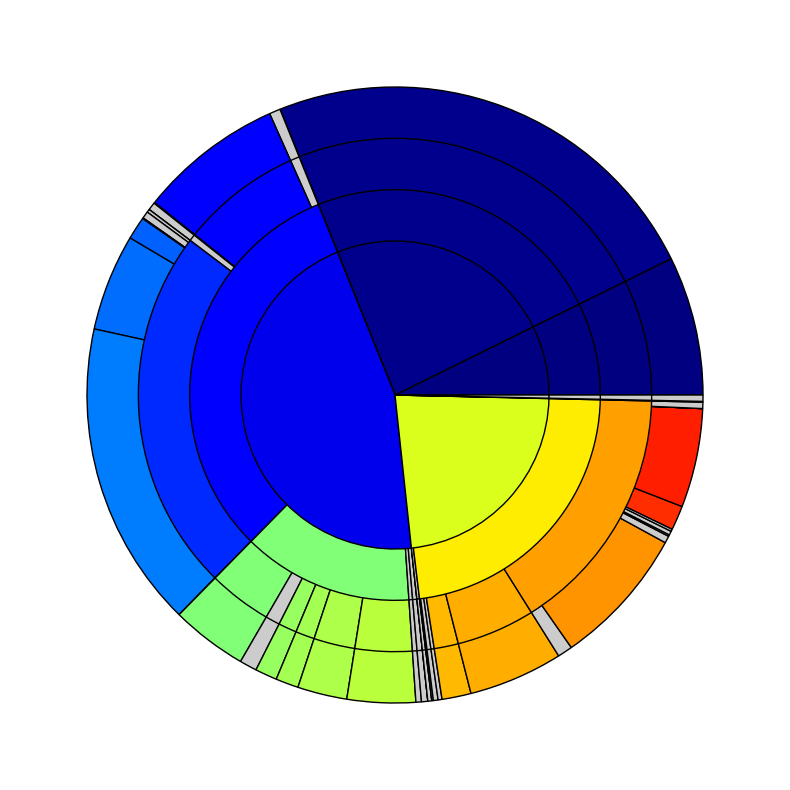

In [15]:
radius_search(
    pts=pts,
    r=750,
    crs='EPSG:4326',
    columns=['employment'],
    silent = True,
)
perf_analysis = analyze_func_perf(plot=True)
perf_analysis['grp_df'].groupby('func_name')['process_time'].sum()

counter_new_cell 0.261 cn 0.629 ov 0.633
create plot for radius sums


eid    employment       industry           lat            lon  \
count  1.516100e+04  15161.000000   15161.000000  1.516100e+04   15161.000000   
mean   2.734620e+08      6.282171  521830.683992  3.588387e+06  429718.656122   
std    3.453785e+08     36.265000  176899.278753  9.391793e+03    9145.503732   
min    1.004717e+06      1.000000     221.000000  3.557083e+06  397755.860451   
25%    2.445476e+07      1.000000  449129.000000  3.584657e+06  427020.752270   
50%    7.045902e+07      2.000000  541810.000000  3.588506e+06  429107.445328   
75%    6.134285e+08      3.000000  561990.000000  3.591108e+06  431551.815726   
max    9.699975e+08   2800.000000  928110.000000  3.626948e+06  467584.063239   

              moved          id_y          id_x  region_comb_nr   cell_region  \
count  15161.000000  15161.000000  15161.000000    15161.000000  15161.000000   
mean    9007.535980    124.079546    126.778445      163.432557  33753.648704   
std     2634.487361     37.299858     36.325684      114.519325  21574.639657   
min     1990.000000      0.000000      0.000000        0.000000      0.000000   
25%     9999.000000    109.000000    116.000000       69.000000  17023.000000   
50%     9999.000000    125.000000    124.000000      168.000000  36067.000000   
75%     9999.000000    135.000000    134.000000      270.000000  55081.000000   
max     9999.000000    277.000000    277.000000      404.000000  76116.000000   

        triangle_id  employment_750m  
count  15161.000000     15161.000000  
mean       4.425170      1371.640063  
std        2.299383      1861.809634  
min        1.000000         0.000000  
25%        2.000000       163.000000  
50%        4.000000       700.000000  
75%        6.000000      1670.000000  
max        8.000000      9179.000000

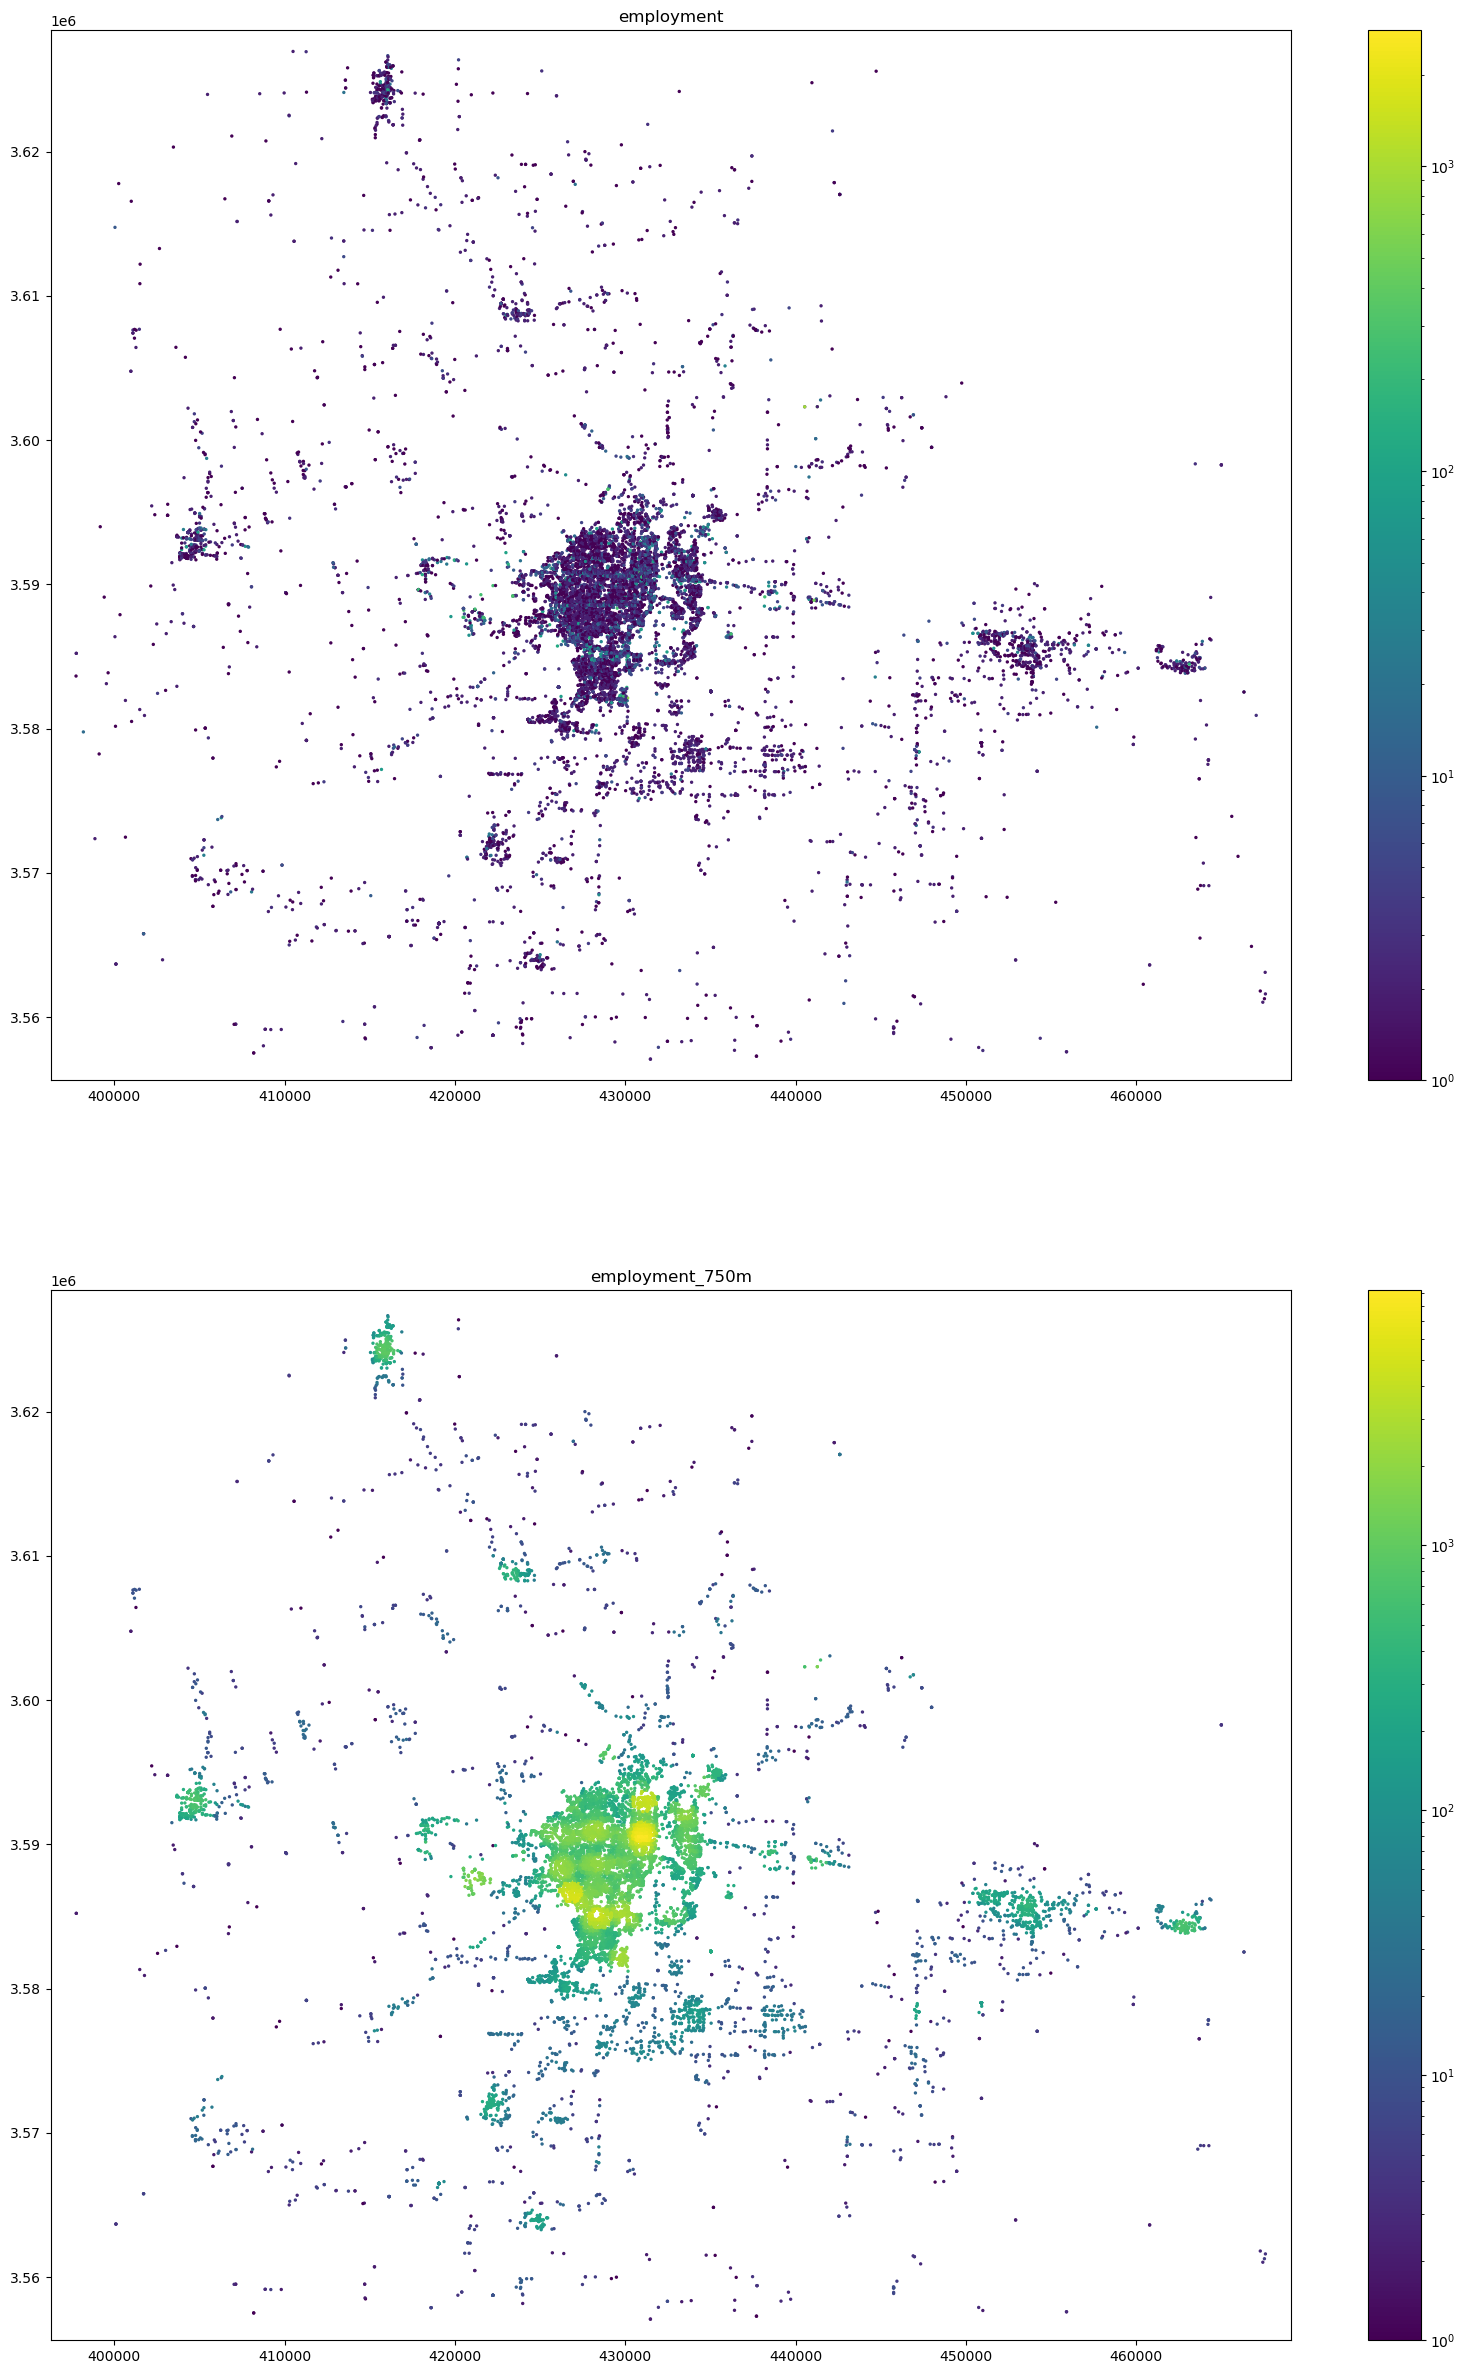

In [ ]:
# only calculate sums (no clustering)
grid = radius_search(
    pts=pts, 
    r=750, 
    columns=['employment'],
    plot_radius_sums={'figsize':(20,30), 'cmap': 'viridis'},
    silent=True
)

# some plots on internal processes

row: eid                   8.042086e+07
employment            1.000000e+00
industry              5.324900e+05
lat                   3.588506e+06
lon                   4.338256e+05
moved                 2.010000e+03
id_y                  1.250000e+02
id_x                  1.430000e+02
region_comb_nr        3.340000e+02
cell_region           5.608300e+04
employment_750m       0.000000e+00
employment_cluster    0.000000e+00
initial_sort          7.580000e+03
Name: 2892, dtype: float64
cells_cntd_by_pt_cell [(124, 142), (124, 143), (124, 144), (125, 142), (125, 143), (125, 144), (126, 142), (126, 143), (126, 144)]
cells_contained_by_pt_region [(123, 142), (123, 143), (123, 144), (124, 141), (124, 145), (125, 141), (125, 145), (127, 143)]
cells_overlapped_by_pt_region [(122, 141), (122, 142), (122, 143), (122, 144), (122, 145), (123, 140), (123, 141), (123, 145), (123, 146), (124, 140), (124, 146), (125, 140), (125, 146), (126, 140), (126, 141), (126, 145), (126, 146), (127, 141), (127, 142

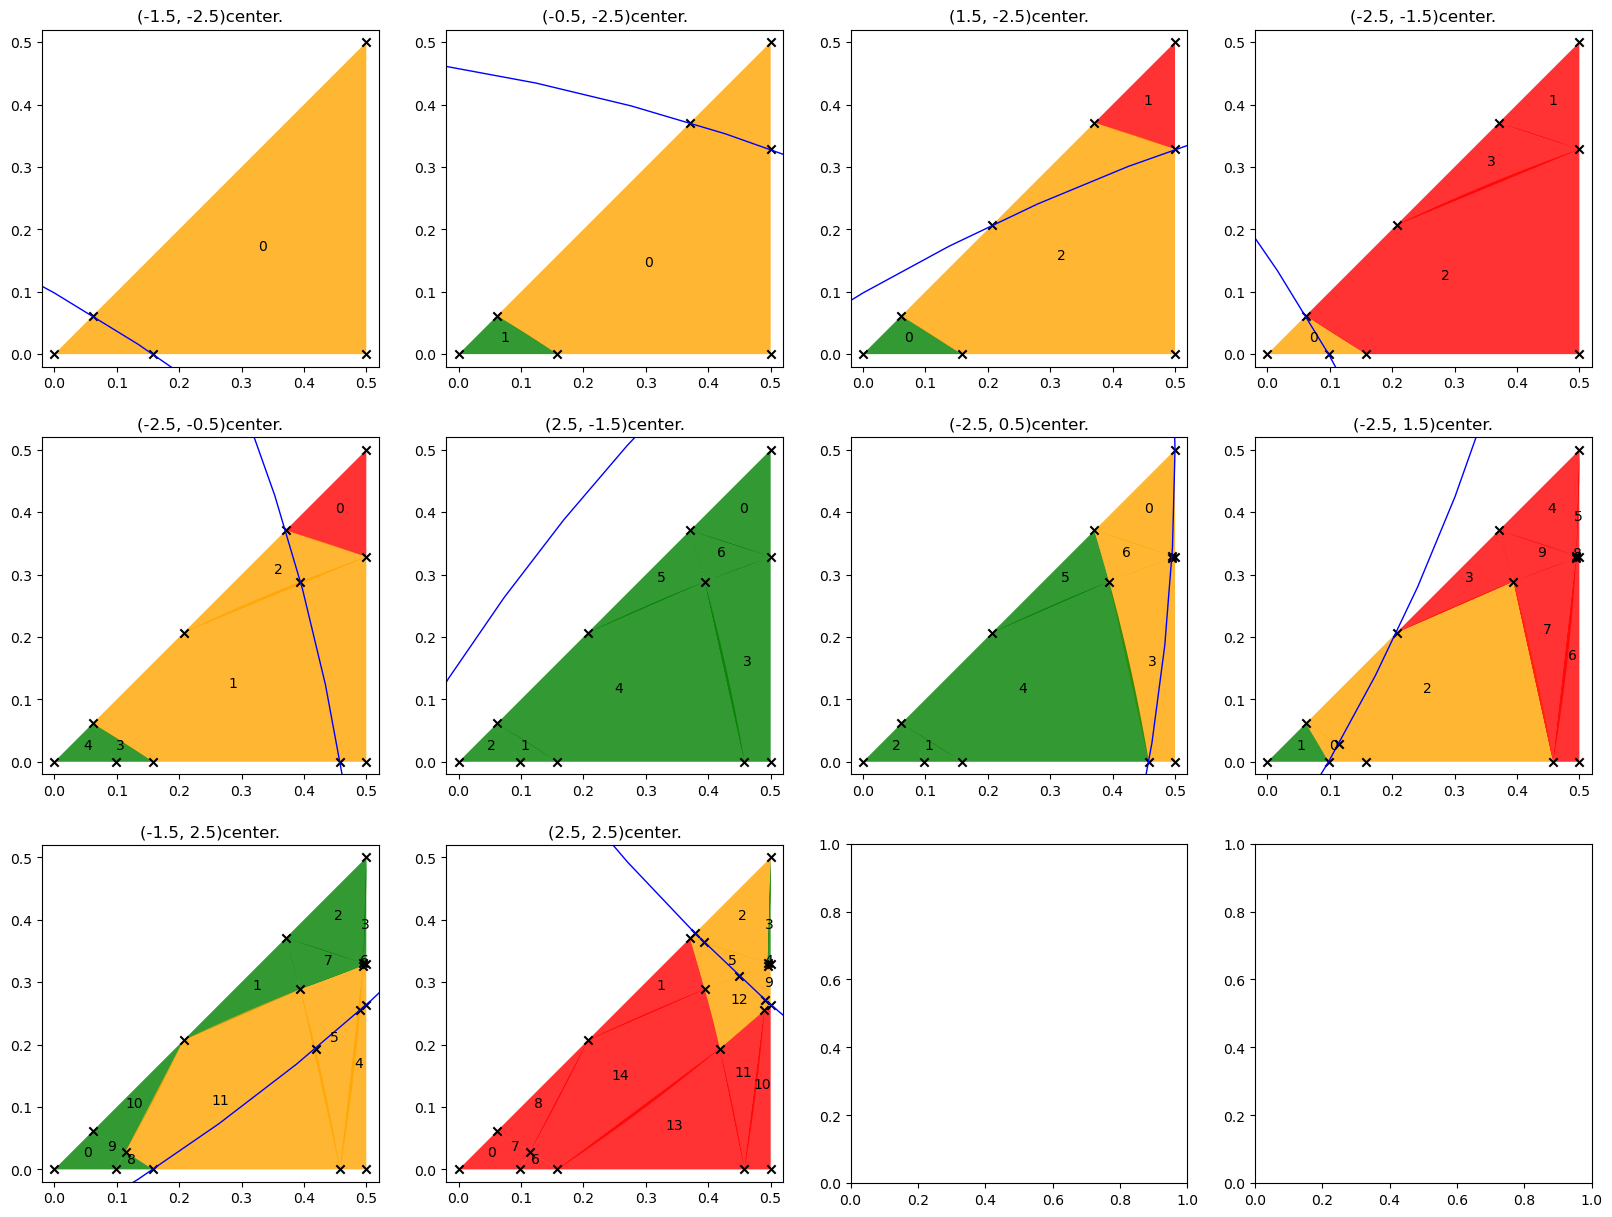

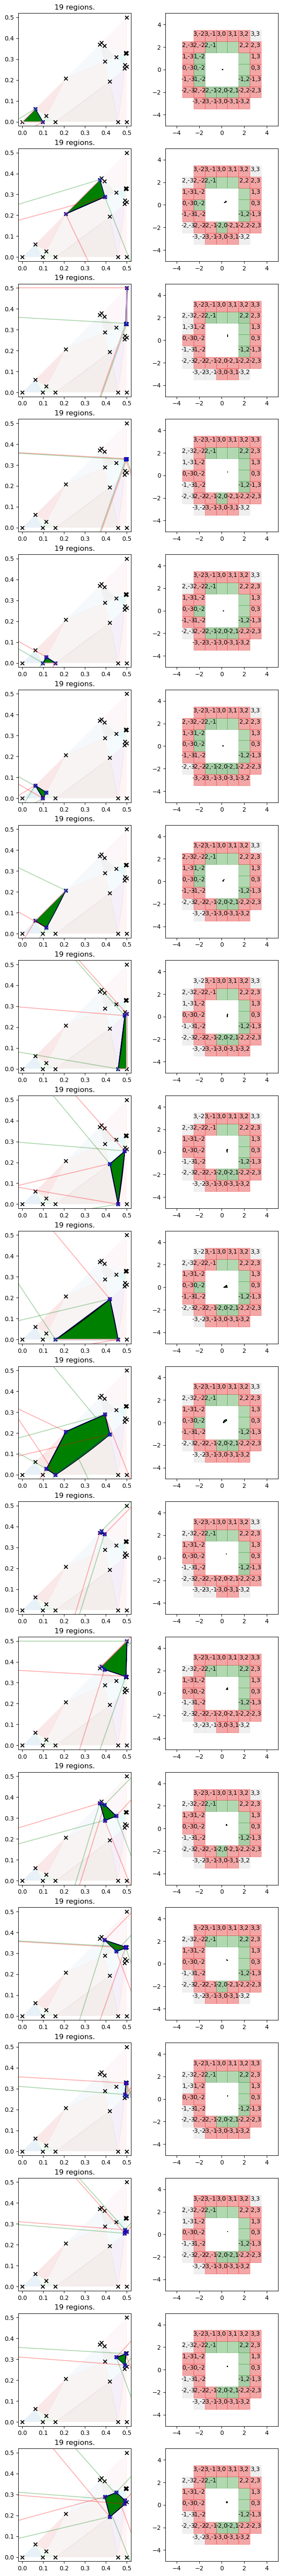

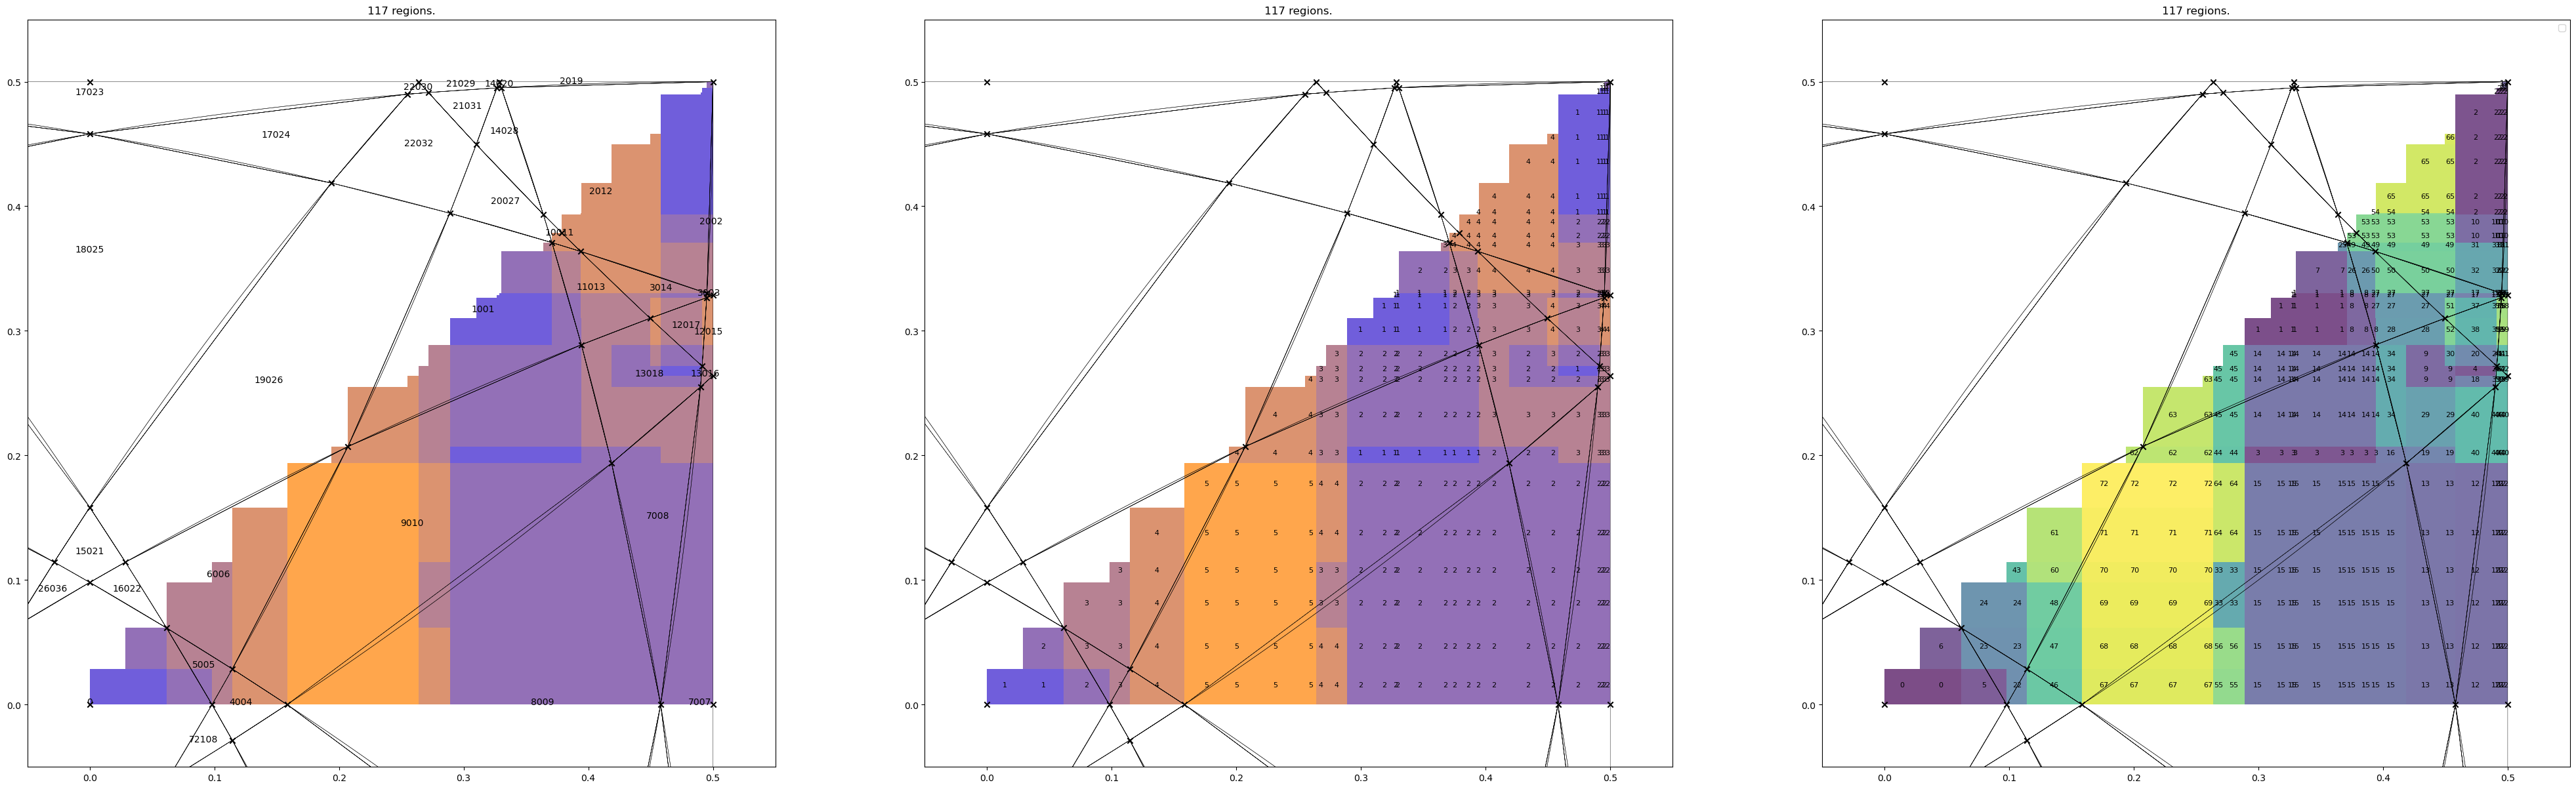

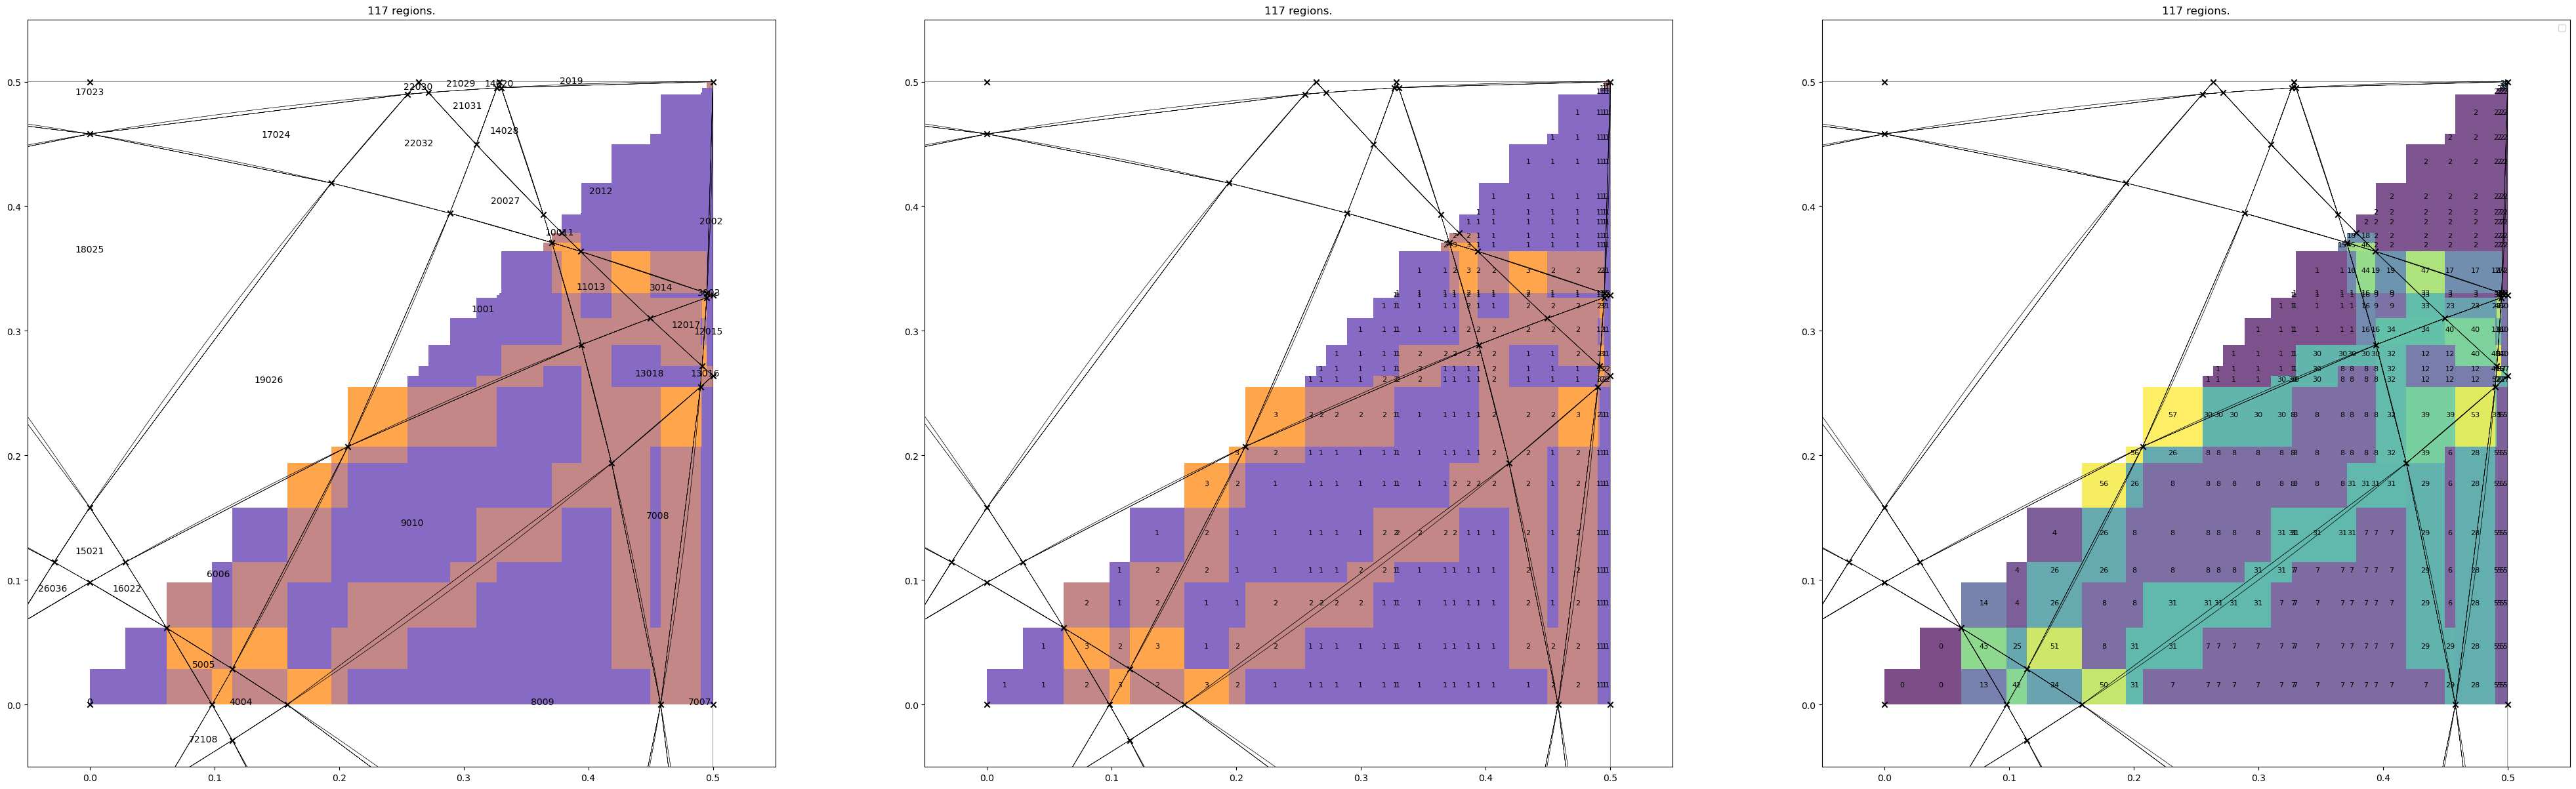

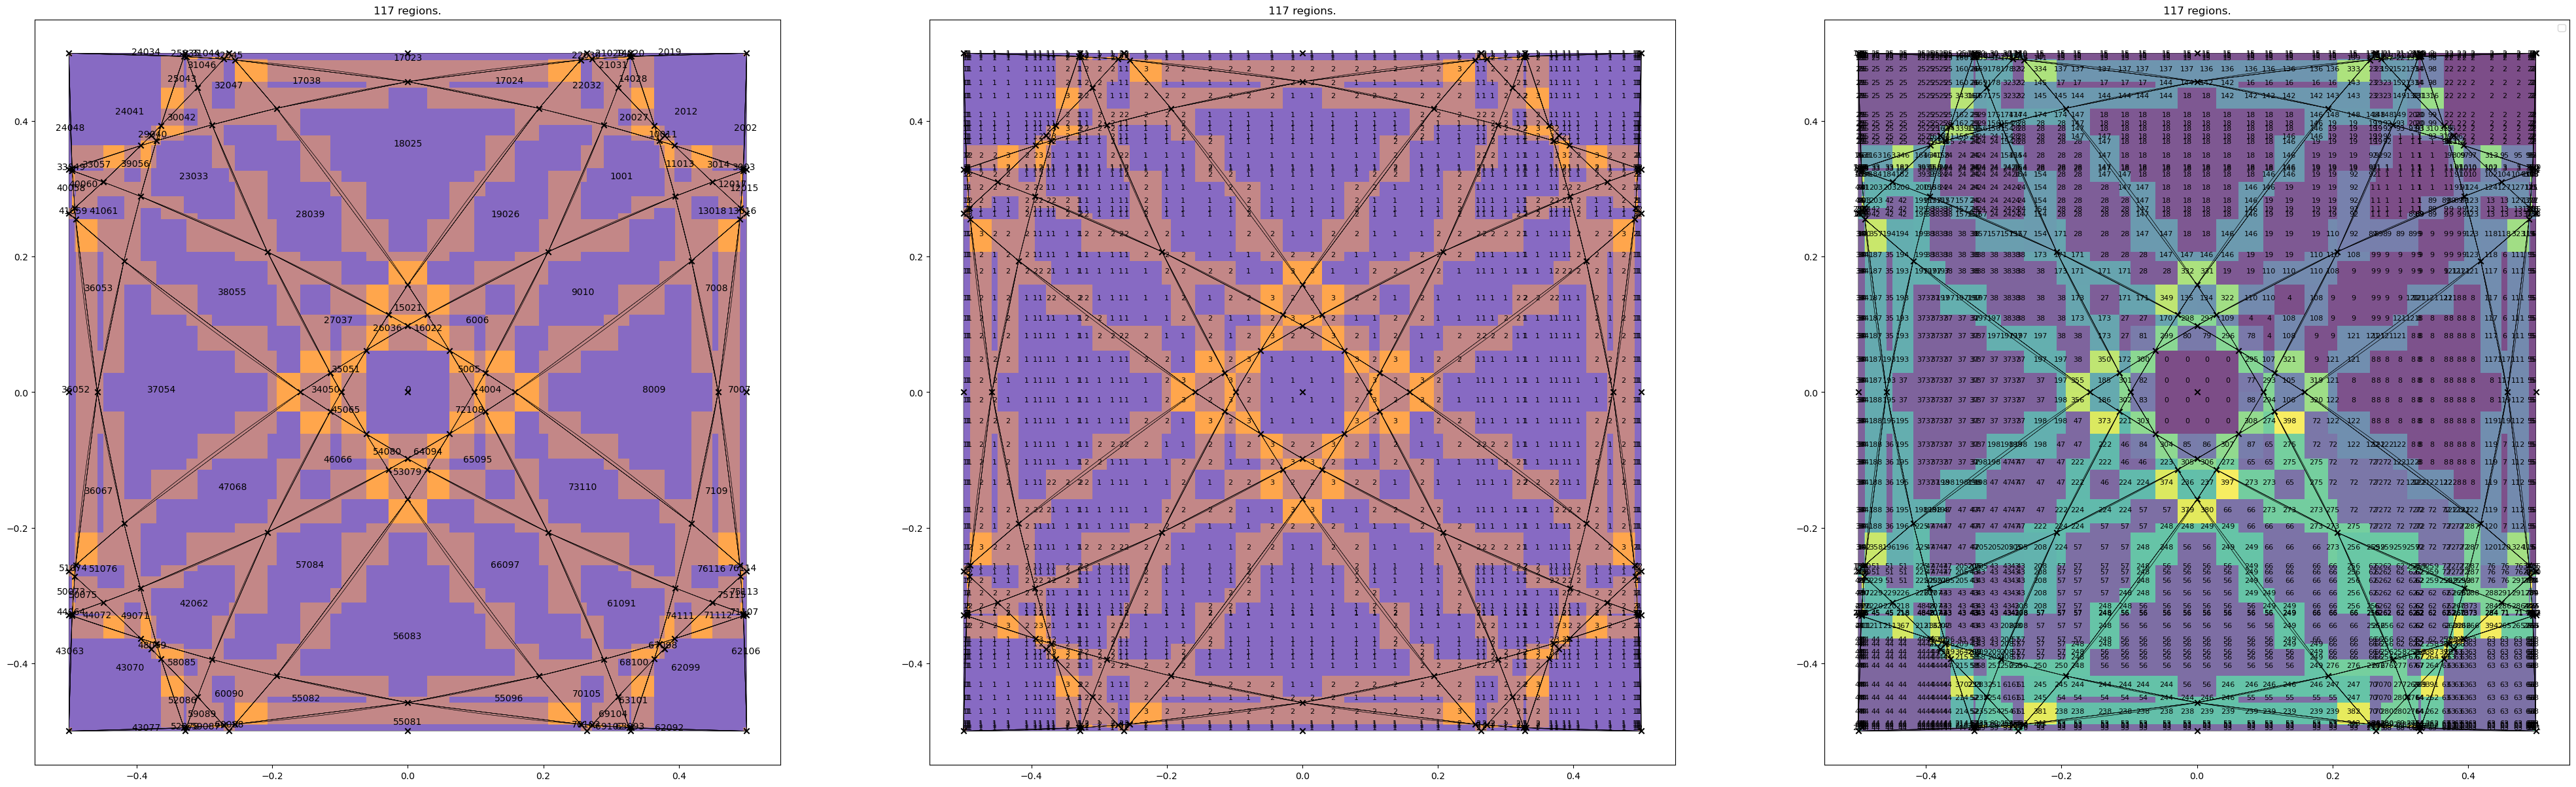

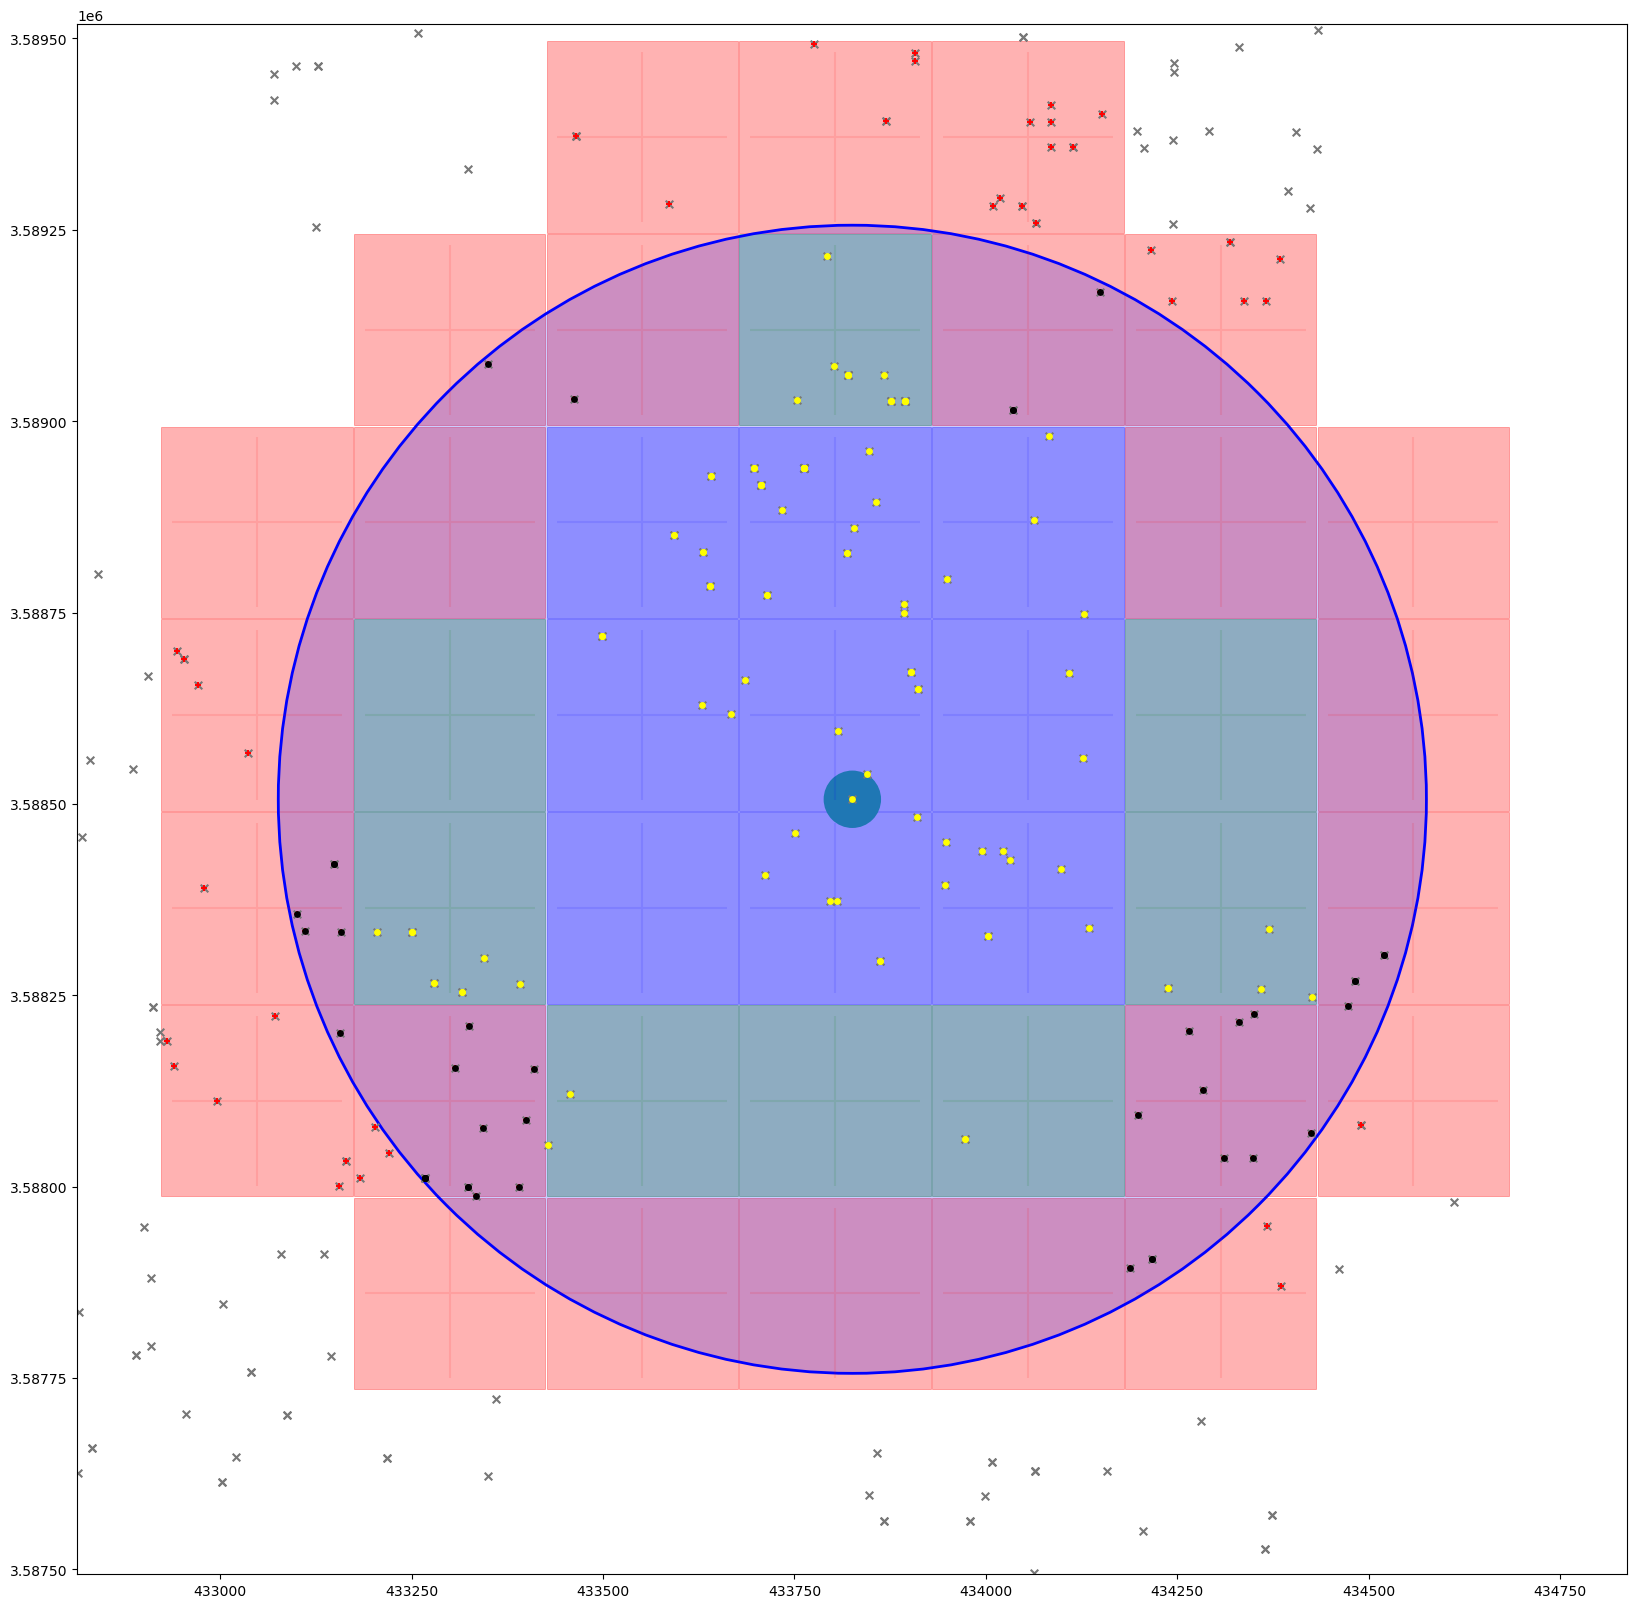

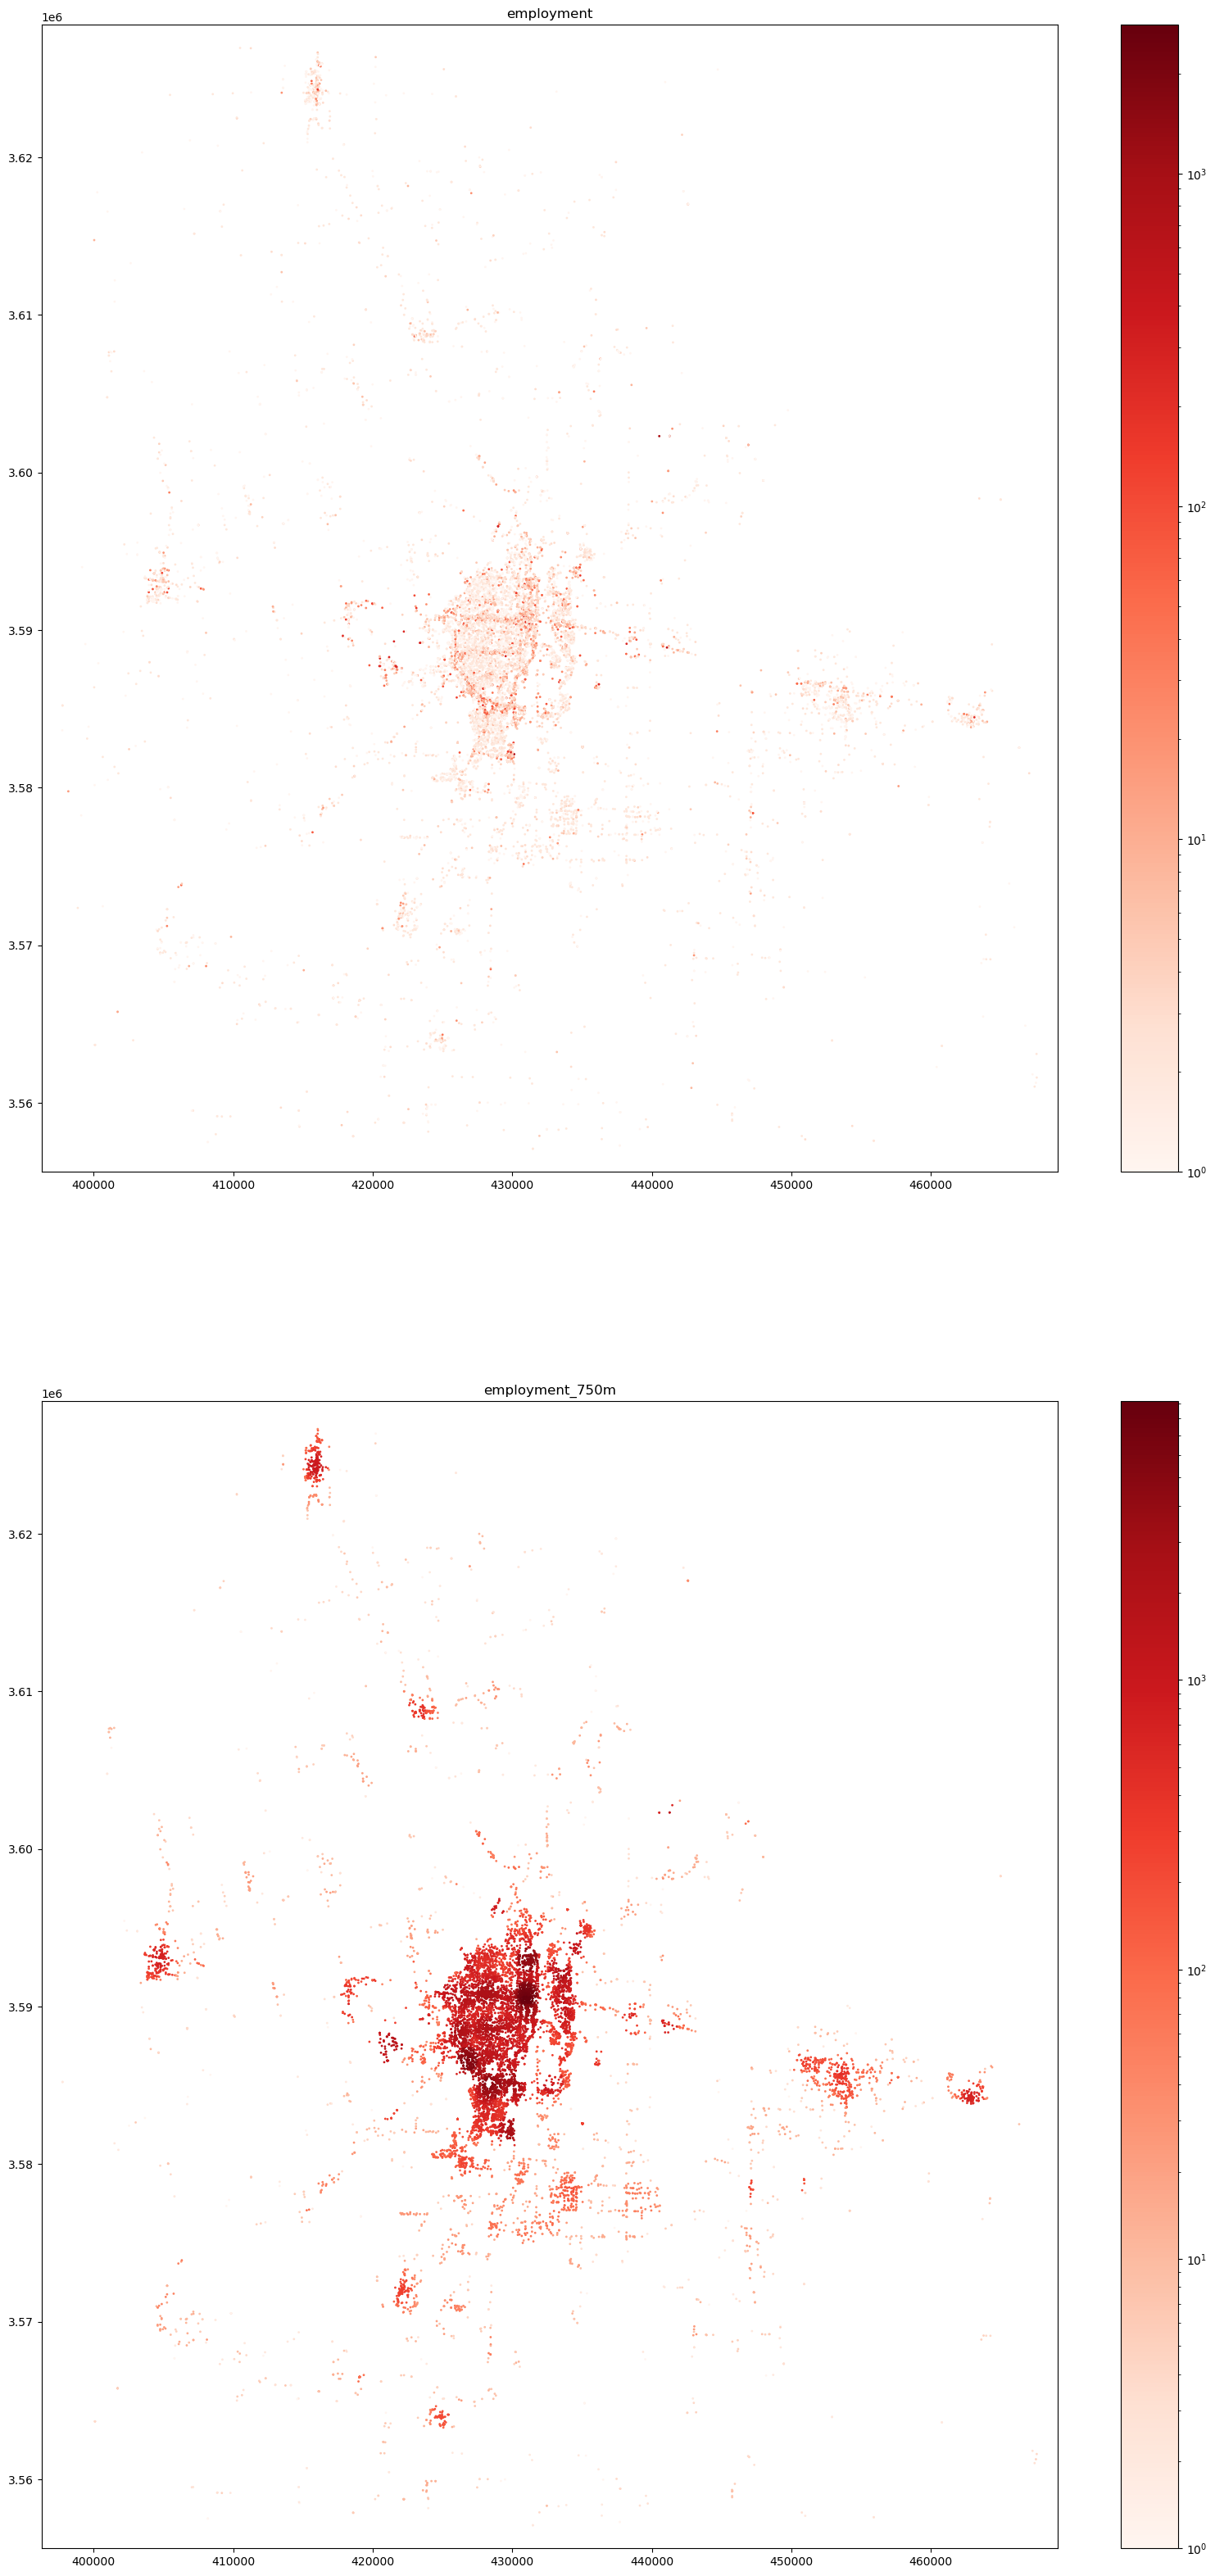

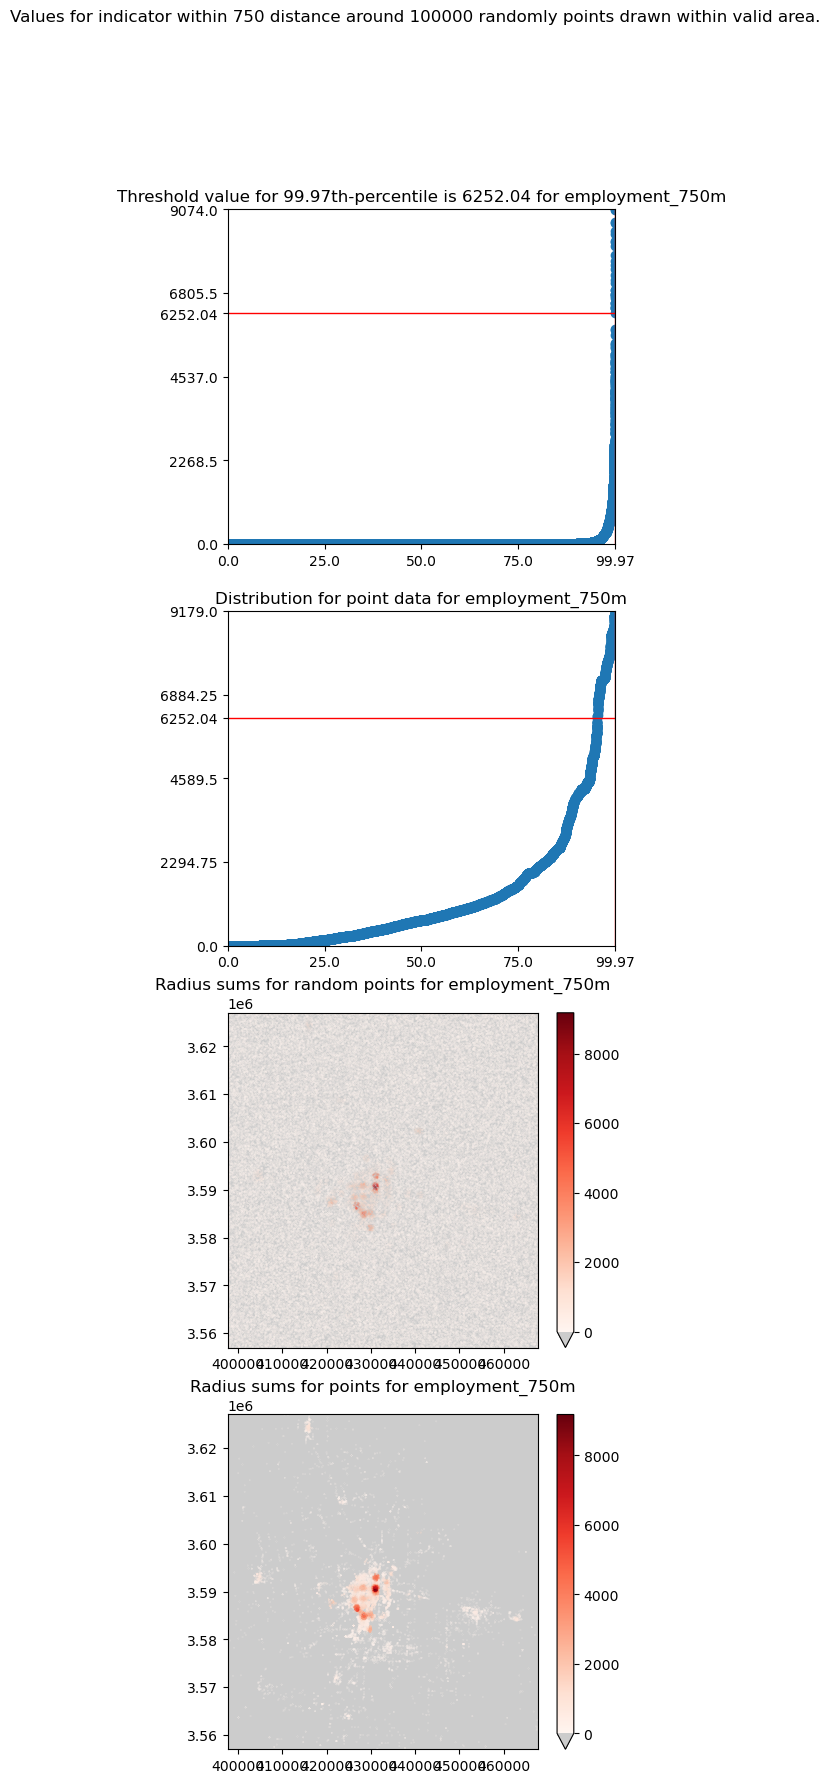

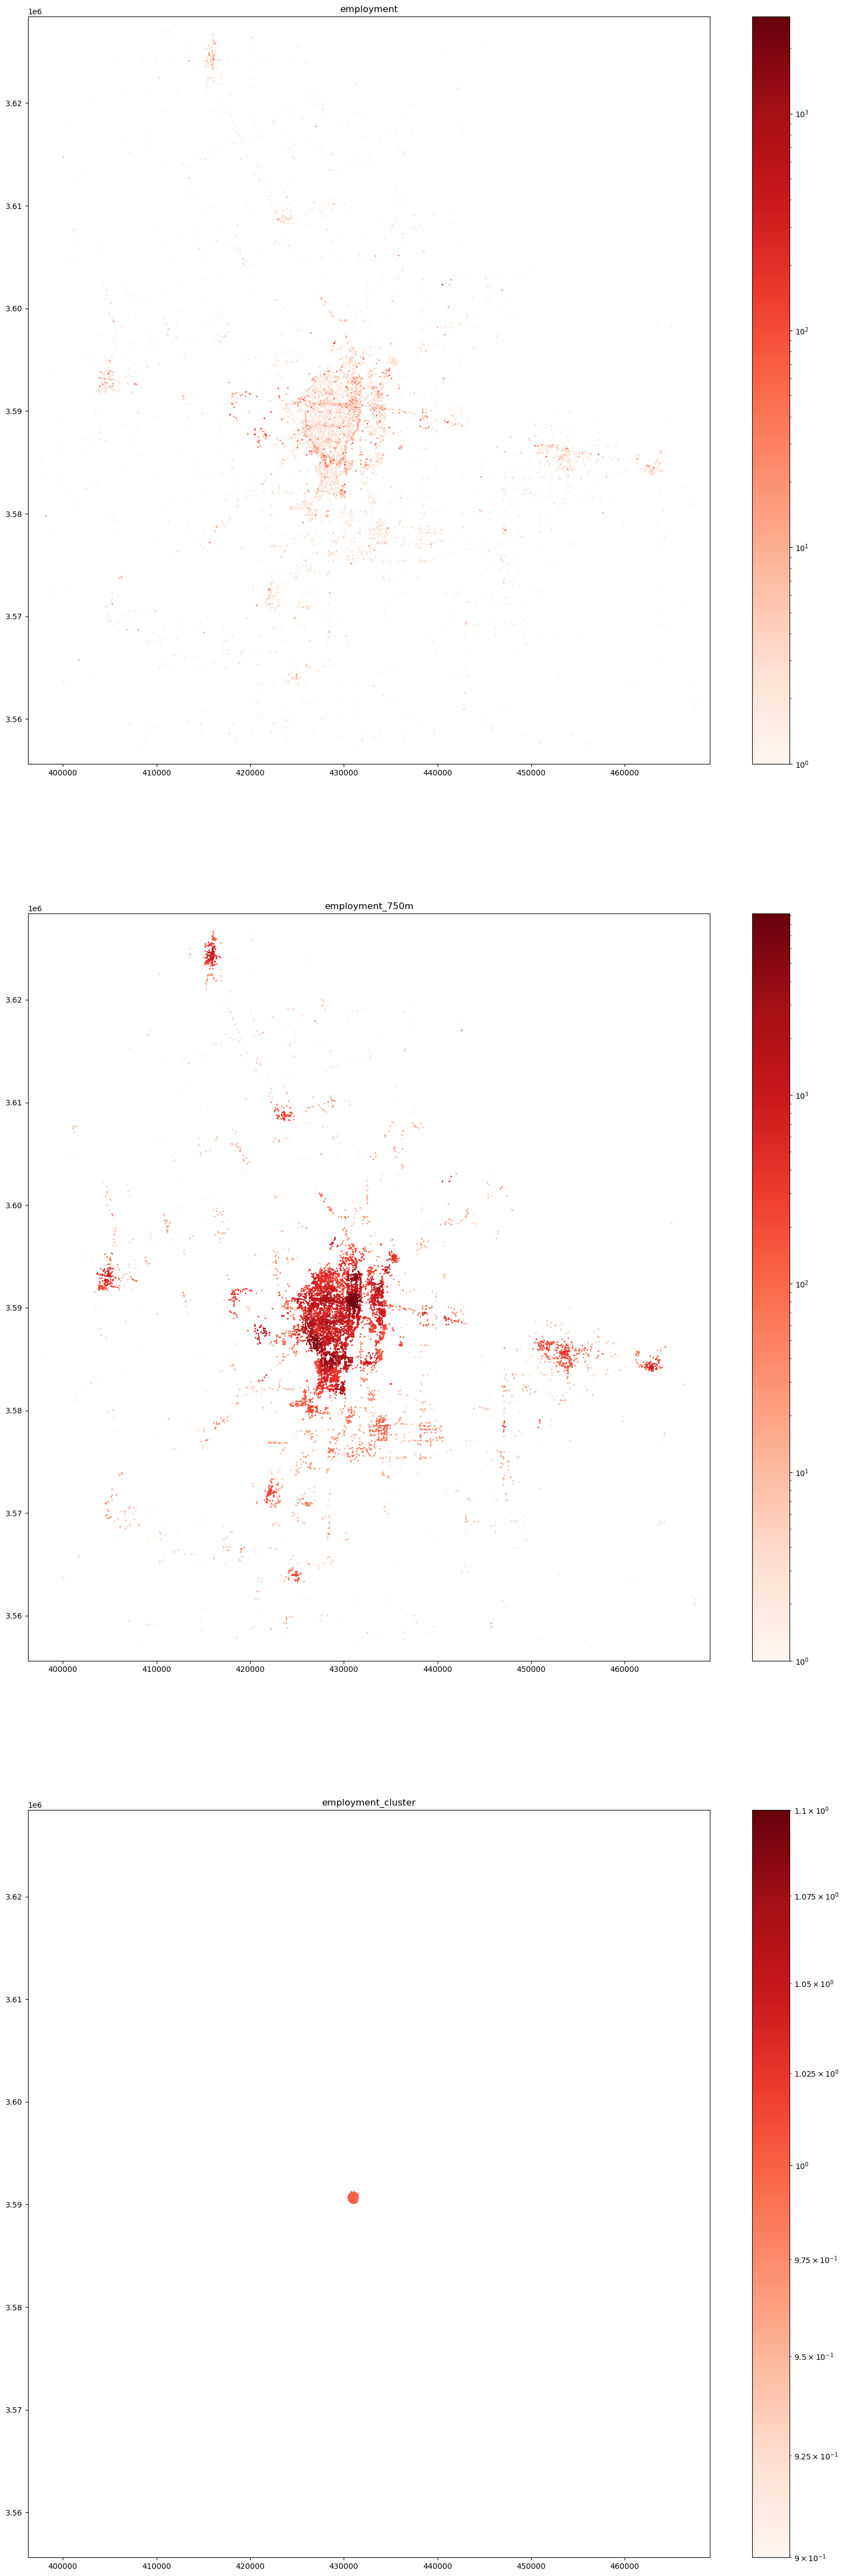

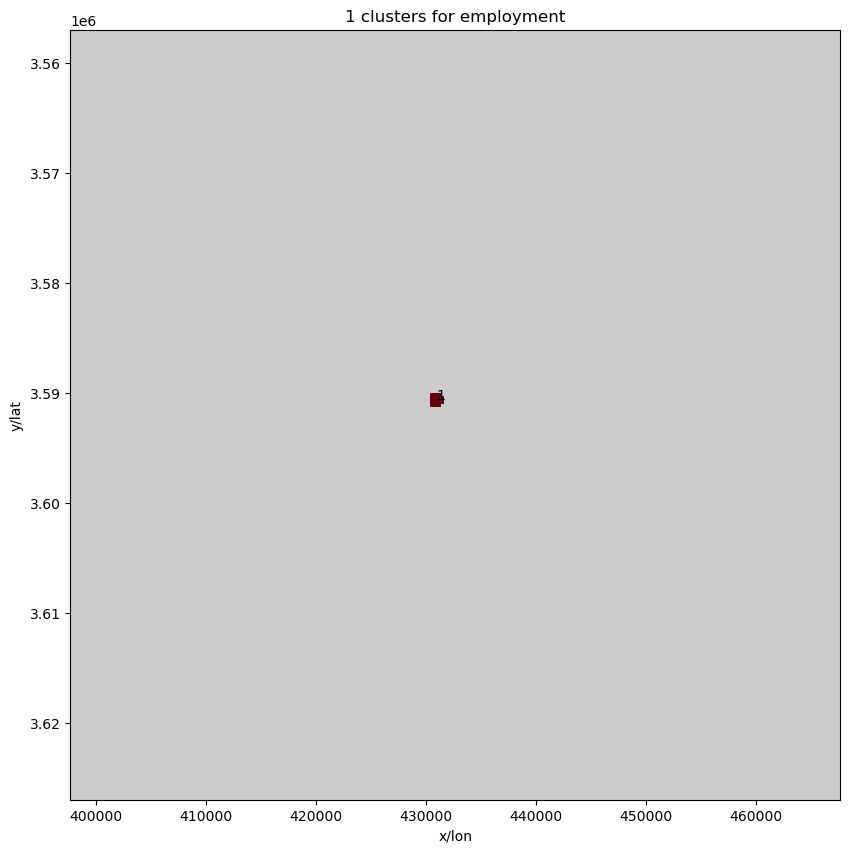

In [14]:
grid = detect_cluster_cells(
    pts=pts,
    crs='EPSG:4326',
    r=750,
    exclude_pt_itself=True,
    distance_thresholds=2500,
    k_th_percentiles=[99.97],
    n_random_points=int(1e5),
    make_convex=True,
    random_seed=0,
    columns=['employment'],
    plot_distribution={},
    plot_radius_sums={},
    plot_cluster_points={},
    plot_pt_disk={},
    plot_cell_reg_assign={},
    plot_offset_checks={},
    plot_offset_regions={},
    plot_offset_raster={},
    plot_cluster_cells={},
    silent = True,
)